<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50;">
    --PRCP-1011-BloodDonaPred--
</div>


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
Predictive Model for Identifying Repeat Blood Donors Using Limited Attributes
</div>

In [2]:
import pickle   
import pandas as pd  
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel(r"C:\Users\pooji\DS-project\PRCP-1011-BloodDonaPred (1)\PRCP-1011-BloodDonaPred\Data\Warm_Up_Predict_Blood_Donations_-_Traning_Data.xlsx")

In [5]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0



<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>By dropping the irrelevant 'id' column from the dataset, we ensure the predictive model focuses only on meaningful features that contribute to identifying repeat blood donors.
        </li>
    </ul>
</div>


In [7]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [8]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0




<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>To enhance clarity and better reflect the dataset's purpose, we renamed the features to more descriptive labels
        </li>
    </ul>
</div>


In [14]:
df.columns = df.columns.str.strip()
df.rename(
    columns={
        'Months since Last Donation': 'last_donation',
        'Number of Donations': 'num_donations',
        'Total Volume Donated (c.c.)': 'total_vol_donation',
        'Months since First Donation': 'first_donation',
        'Made Donation in March 2007': 'target'
    },
    inplace=True
)
df.columns = df.columns.str.strip()


In [16]:
df.head()

,last_donation,num_donations,total_vol_donation,first_donation,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0



<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
Data Preprocessing</div>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   last_donation       576 non-null    int64
 1   num_donations       576 non-null    int64
 2   total_vol_donation  576 non-null    int64
 3   first_donation      576 non-null    int64
 4   target              576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


In [21]:
df.describe()

,last_donation,num_donations,total_vol_donation,first_donation,target
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
last_donation,576.0,9.439236,8.175454,0.0,2.0,7.0,14.00,74.0
num_donations,576.0,5.427083,5.740010,1.0,2.0,4.0,7.00,50.0
total_vol_donation,576.0,1356.770833,1435.002556,250.0,500.0,1000.0,1750.00,12500.0
first_donation,576.0,34.050347,24.227672,2.0,16.0,28.0,49.25,98.0
target,576.0,0.239583,0.427200,0.0,0.0,0.0,0.00,1.0


In [25]:
df.dtypes

last_donation         int64
num_donations         int64
total_vol_donation    int64
first_donation        int64
target                int64
dtype: object

In [27]:
df.shape

(576, 5)

In [29]:
df.columns

Index(['last_donation', 'num_donations', 'total_vol_donation',
       'first_donation', 'target'],
      dtype='object')

In [31]:
df.isnull().sum()

last_donation         0
num_donations         0
total_vol_donation    0
first_donation        0
target                0
dtype: int64

In [33]:
df.duplicated().sum()

153

In [35]:
df.target.value_counts()

target
0    438
1    138
Name: count, dtype: int64




<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>It is better to remove the duplicates for cleaner data and to avoid overfitting
        </li>
    </ul>
</div>


In [38]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [40]:
df.target.value_counts()

target
0    305
1    118
Name: count, dtype: int64

In [42]:
df.nunique()

last_donation         29
num_donations         29
total_vol_donation    29
first_donation        75
target                 2
dtype: int64

In [44]:
df.columns

Index(['last_donation', 'num_donations', 'total_vol_donation',
       'first_donation', 'target'],
      dtype='object')


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
EDA </div>


In [47]:
df.dtypes

last_donation         int64
num_donations         int64
total_vol_donation    int64
first_donation        int64
target                int64
dtype: object

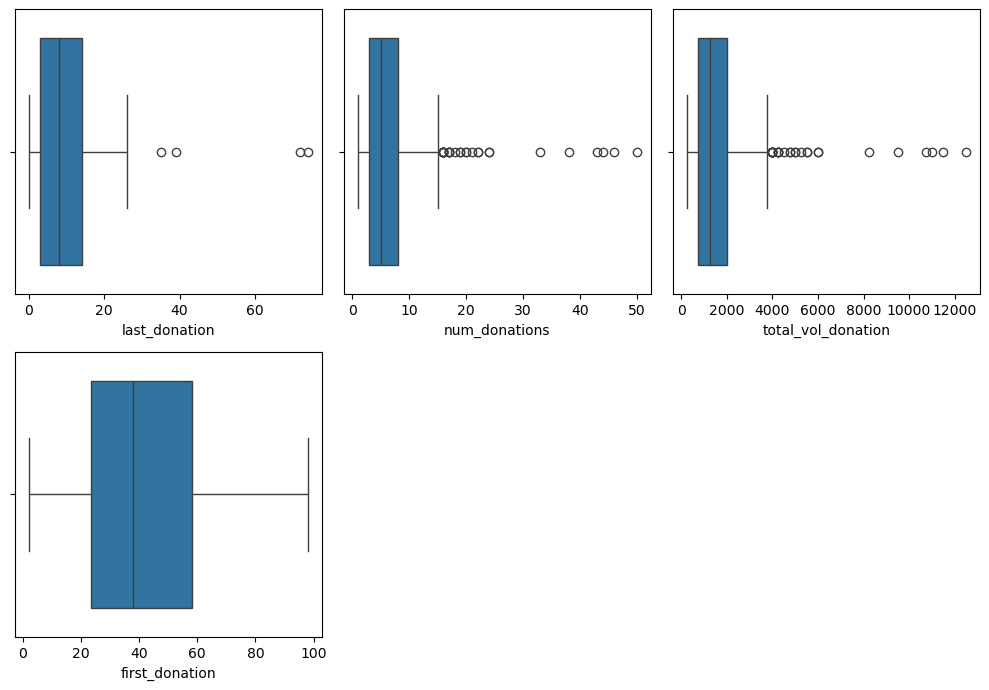

In [49]:
plt.figure(figsize=(10,10))
plot = 1

a = ['last_donation','num_donations', 'total_vol_donation', 'first_donation']

for i in a:
    if plot <= 9:
        ax = plt.subplot(3, 3, plot)
        sns.boxplot(x=df[i])  
        plt.xlabel(i)
    plot += 1

plt.tight_layout()

<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> We can clearly observe that there are some outliers in the features last_donation, num_donations, and total_vol_donation based on the above plots.
</li>
    </ul>
</div>


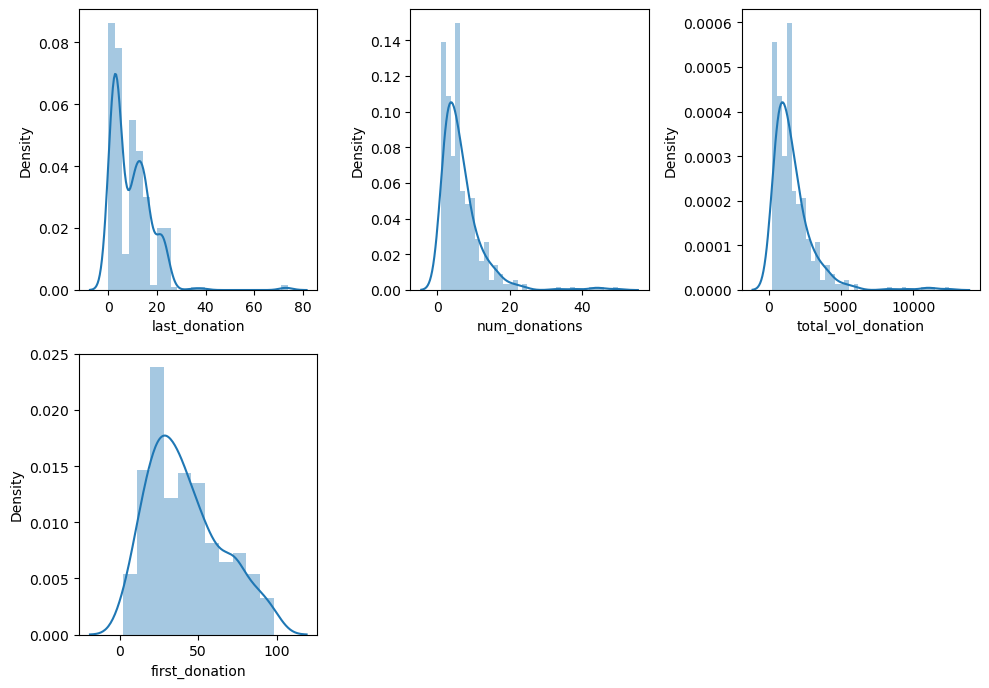

In [51]:
plt.figure(figsize=(10,10))
plot = 1

a = ['last_donation','num_donations', 'total_vol_donation', 'first_donation']

for i in a:
    if plot <= 9:
        ax = plt.subplot(3, 3, plot)
        sns.distplot(x=df[i])  
        plt.xlabel(i)
    plot += 1

plt.tight_layout()

In [52]:
q1 = df['num_donations'].quantile(0.25)
q3 = df['num_donations'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5* iqr
df.loc[df['num_donations']>upper]

,last_donation,num_donations,total_vol_donation,first_donation,target
0,2,50,12500,98,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
8,5,46,11500,98,1
28,2,16,4000,64,0
37,4,20,5000,69,1
47,4,19,4750,69,1
53,3,16,4000,74,0
60,4,17,4250,71,1


In [54]:
df.loc[df['num_donations']>upper,'num_donations'] = 7

In [55]:
q1 = df['total_vol_donation'].quantile(0.25)
q3 = df['total_vol_donation'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5* iqr
df.loc[df['total_vol_donation']>upper]

,last_donation,num_donations,total_vol_donation,first_donation,target
0,2,7,12500,98,1
2,1,7,4000,35,1
3,2,7,5000,45,1
4,1,7,6000,77,0
8,5,7,11500,98,1
28,2,7,4000,64,0
37,4,7,5000,69,1
47,4,7,4750,69,1
53,3,7,4000,74,0
60,4,7,4250,71,1



<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>
            num_donations: 7 </li>
        <li>
            total_vol_donation: 3500 
        </li>
        <li>this combination is reasonable and matches standard blood donation data patterns.</li>
        <li>The changes are beneficial as they slightly improve class balance and eliminate potential data inconsistencies, leading to a more reliable model.</li>
    </ul>
</div>


In [61]:
df.loc[df['total_vol_donation']>upper,'total_vol_donation'] = 3500

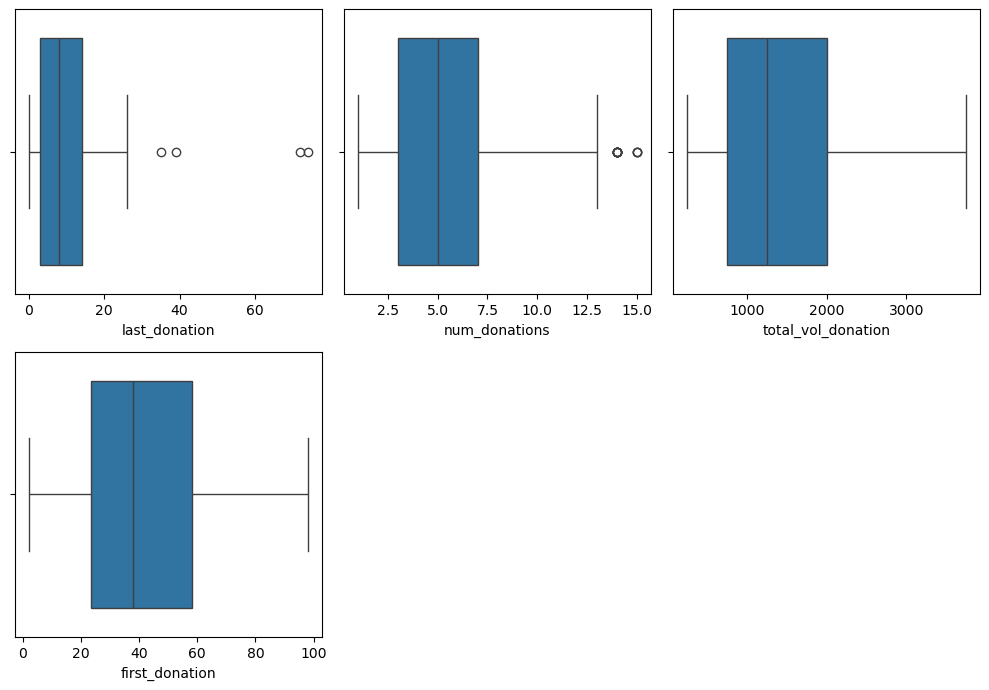

In [63]:
plt.figure(figsize=(10,10))
plot = 1

a = ['last_donation','num_donations', 'total_vol_donation', 'first_donation']

for i in a:
    if plot <= 9:
        ax = plt.subplot(3, 3, plot)
        sns.boxplot(x=df[i])  
        plt.xlabel(i)
    plot += 1

plt.tight_layout()

In [64]:
df.target.value_counts()

target
0    305
1    118
Name: count, dtype: int64

In [67]:
df.columns

Index(['last_donation', 'num_donations', 'total_vol_donation',
       'first_donation', 'target'],
      dtype='object')

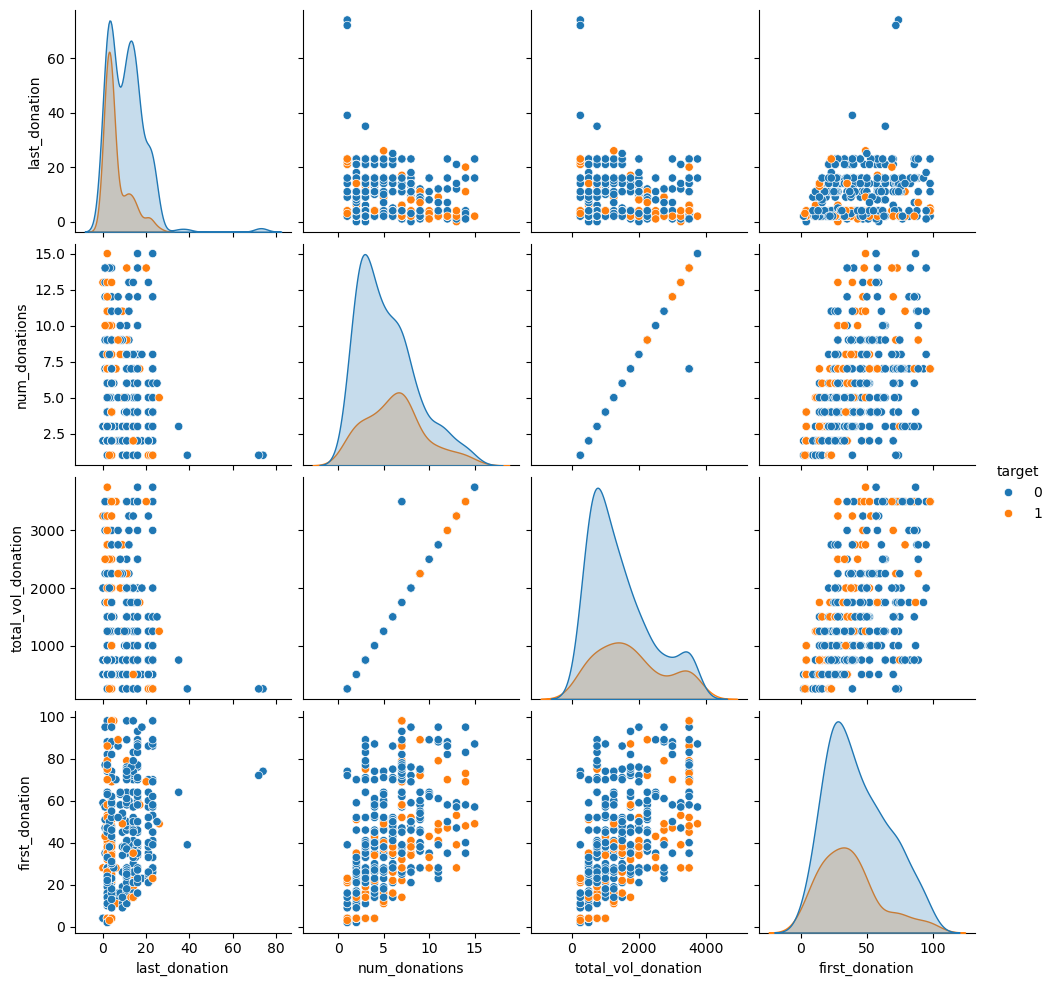

In [69]:
sns.pairplot(df,hue= 'target')



<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>The heatmap above clearly shows that the last_donation feature has multicollinearity, so it would be beneficial to remove it.</li>
        <li>There was a high correlation between num_donations and total_vol_donation. Since already one col has been removed, only three features remain. Given the limited number of features, it is better to keep them. </li>
    </ul>
</div>


<Axes: >

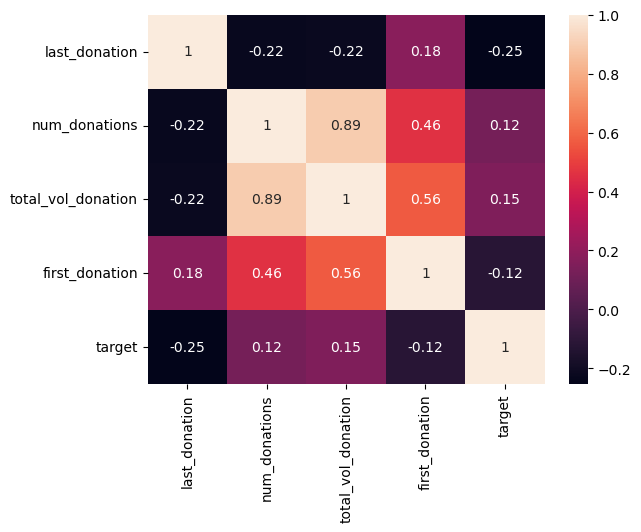

In [71]:
sns.heatmap(df.corr(),annot=True)

In [72]:
df.shape

(423, 5)


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
Model Building</div>





<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Logistic Regression, Random Forest,GradientBoosting, XGBoost, lightgbm (with class weights) are great starting points for imbalanced datasets.</div>
</li>
    </ul>
</div>
v>


In [75]:
df.shape

(423, 5)

<div style="background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #4CAF50;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Dropping last_donation helped because it was irrelevant and added noise. Removing highly correlated features didn’t help since they still had useful information. Some models handle correlation well, so removing them may have hurt performance. Instead of dropping features based only on correlation. </div>
</li>
    </ul>
</div>
v>


In [77]:
x = df.drop(['target','last_donation'], axis=1)
y = df[['target']]

In [78]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=2)

In [79]:
smote = SMOTE(random_state=42)
x_train_balance, y_train_balance = smote.fit_resample(x_train, y_train)

In [80]:
y.value_counts()

target
0         305
1         118
Name: count, dtype: int64

In [81]:
len(y_train)

296

In [82]:
len(x_train_balance)

414


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">* LogisticRegression *
</div>


In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train_balance, y_train_balance)

LogisticRegression(class_weight='balanced')

In [96]:
y_predLR = model.predict(x_test)

In [98]:
accuracy = accuracy_score(y_test, y_predLR) * 100
print(round(accuracy, 2))

76.38


In [100]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        98
           1       0.49      0.69      0.57        29

    accuracy                           0.76       127
   macro avg       0.69      0.74      0.70       127
weighted avg       0.80      0.76      0.78       127



In [102]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR) * 100
roc_auc

73.76847290640394

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using GridSearchCV(LogisticRegression) *</div>

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['saga', 'liblinear'],  
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced'],
    'tol': [1e-4, 1e-3],
    'intercept_scaling': [1, 2]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train_balance, y_train_balance)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'intercept_scaling': [1, 2],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             verbose=1)

In [199]:
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters:  {'C': 0.001, 'class_weight': 'balanced', 'intercept_scaling': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}


In [200]:
model1 = LogisticRegression(C= 1, class_weight= 'balanced',intercept_scaling= 1, max_iter=100, penalty='l2', solver='liblinear', tol= 0.0001)
model1.fit(x_train_balance, y_train_balance)

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

In [531]:
y_predLR_T = model1.predict(x_test)

In [533]:
accuracy = accuracy_score(y_test, y_predLR_T) * 100
accuracy

59.84251968503938

In [535]:
print(classification_report(y_test,y_predLR_T))

              precision    recall  f1-score   support

           0       0.90      0.54      0.68        98
           1       0.34      0.79      0.47        29

    accuracy                           0.60       127
   macro avg       0.62      0.67      0.57       127
weighted avg       0.77      0.60      0.63       127



In [289]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR_T) * 100
roc_auc

73.83884588318085


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* RandomForest *</div>

In [678]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(x_train_balance, y_train_balance)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [680]:
y_predRF = model_rf.predict(x_test)   

In [682]:
accuracy = accuracy_score(y_test, y_predRF) * 100
print(round(accuracy, 2)) 

63.78


In [684]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74        98
           1       0.31      0.48      0.38        29

    accuracy                           0.64       127
   macro avg       0.56      0.58      0.56       127
weighted avg       0.70      0.64      0.66       127



In [686]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predRF) * 100
roc_auc

58.32160450387052


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using RandomForest *</div>

In [125]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 200, 500]
max_features = ['auto', 'sqrt']
max_depth = [10, 50, 100]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)   


rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',
                           param_distributions=random_grid, n_iter=100, cv=2,
                               verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(x_train_balance, y_train_balance)     

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [127]:
rf_best_params = rf_cv.best_params_       
print(f"Best paramters: {rf_best_params})")  

Best paramters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True})


In [129]:
rf_clf2 = RandomForestClassifier(class_weight='balanced',n_estimators=100,min_samples_leaf=2, min_samples_split=2, max_features="sqrt", max_depth=100, bootstrap = True)
rf_clf2.fit(x_train_balance, y_train_balance)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10)

In [131]:
y_predRF_T=rf_clf2.predict(x_test)   
accuracy = accuracy_score(y_test, y_predRF_T) * 100
accuracy

69.29133858267717

In [133]:
print(classification_report(y_test,y_predRF_T))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        98
           1       0.38      0.52      0.43        29

    accuracy                           0.69       127
   macro avg       0.61      0.63      0.61       127
weighted avg       0.73      0.69      0.71       127



In [135]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predRF_T) * 100
roc_auc

63.10696692470091

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* GradientBoosting *</div>

In [137]:
from sklearn.ensemble import GradientBoostingClassifier  
gbm=GradientBoostingClassifier()
gbm.fit(x_train_balance, y_train_balance) 

GradientBoostingClassifier()

In [139]:
y_predGB =gbm.predict(x_test)     

In [141]:
accuracy = accuracy_score(y_test, y_predGB) * 100
print(round(accuracy, 2)) 

71.65


In [143]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80        98
           1       0.41      0.59      0.49        29

    accuracy                           0.72       127
   macro avg       0.64      0.67      0.65       127
weighted avg       0.76      0.72      0.73       127




<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using GradientBoosting *</div>

In [146]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 65, 80, 100],
}
XGB=GradientBoostingClassifier() 


rcv = RandomizedSearchCV(estimator=XGB, scoring='accuracy',
                           param_distributions=param_grid, n_iter=100, cv=2,
                               verbose=2, n_jobs=-1)
                               
                        
rcv.fit(x_train_balance, y_train_balance)
cv_best_params = rcv.best_params_

Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [148]:
print(f"Best paramters: {cv_best_params})")

Best paramters: {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.4})


In [150]:
XGB2=GradientBoostingClassifier(n_estimators=80, max_depth=7, learning_rate=0.4)
XGB2.fit(x_train_balance, y_train_balance)

GradientBoostingClassifier(learning_rate=0.4, max_depth=7, n_estimators=50)

In [152]:
y_predGB_T=XGB2.predict(x_test)

In [154]:
accuracy = accuracy_score(y_test, y_predGB_T) * 100
print(round(accuracy, 2)) 

66.14


In [156]:
print(classification_report(y_test,y_predGB_T))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        98
           1       0.32      0.41      0.36        29

    accuracy                           0.66       127
   macro avg       0.56      0.57      0.56       127
weighted avg       0.70      0.66      0.68       127




<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* xgboost *</div>

In [159]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [161]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train_balance, y_train_balance)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [163]:
y_predXGB =xgb_r.predict(x_test)

In [165]:
accuracy = accuracy_score(y_test, y_predXGB) * 100
print(round(accuracy, 2)) 

69.29


In [167]:
print(classification_report(y_test,y_predXGB))  

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        98
           1       0.37      0.48      0.42        29

    accuracy                           0.69       127
   macro avg       0.60      0.62      0.60       127
weighted avg       0.73      0.69      0.71       127




<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of XGBoost *</div>

In [170]:
from xgboost import XGBClassifier

In [172]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [100, 200, 30],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}


XGB = XGBClassifier(random_state=42,verbosity=0,silent=0)  

rcv = RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid,
                        n_iter=100, cv=2,verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(x_train_balance, y_train_balance)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best paramters: {'reg_lambda': 0, 'reg_alpha': 0.4, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.4})


In [174]:
XGB_T=XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.4, n_estimators=30, max_depth=5, learning_rate=0.01, gamma=0.1)
XGB_T.fit(x_train_balance, y_train_balance)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [176]:
y_predXGB_T =XGB_T.predict(x_test)

In [178]:
accuracy = accuracy_score(y_test, y_predXGB_T) * 100
print(round(accuracy, 2)) 

63.78


In [180]:
print(classification_report(y_test,y_predXGB))  

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        98
           1       0.37      0.48      0.42        29

    accuracy                           0.69       127
   macro avg       0.60      0.62      0.60       127
weighted avg       0.73      0.69      0.71       127



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LightGBM *</div>

In [324]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [104]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(x_train_balance, y_train_balance)

[LightGBM] [Info] Number of positive: 207, number of negative: 207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier()

In [106]:
y_predGBM =lgb_clf.predict(x_test)

In [108]:
accuracy = accuracy_score(y_test, y_predGBM) * 100
print(round(accuracy, 2)) 

66.93


In [110]:
print(classification_report(y_test,y_predGBM))  

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        98
           1       0.35      0.52      0.42        29

    accuracy                           0.67       127
   macro avg       0.59      0.62      0.59       127
weighted avg       0.72      0.67      0.69       127




<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of LightGBM *</div>

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

LGB = LGBMClassifier(random_state=42)

rcv = RandomizedSearchCV(estimator=LGB,param_distributions=param_grid,scoring='accuracy',n_iter=100,cv=2,verbose=2,random_state=42,n_jobs=-1)

rcv.fit(x_train_balance, y_train_balance)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 207, number of negative: 207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

RandomizedSearchCV(cv=2, estimator=LGBMClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.03, 0.06,
                                                          0.1],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'n_estimators': [50, 65, 80],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [337]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0, 'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0})


In [339]:
LXGB_T=LGBMClassifier(reg_lambda= 0.2, reg_alpha= 0, n_estimators=65, max_depth=5,gamma= 0, learning_rate=0.1)
LXGB_T.fit(x_train_balance, y_train_balance)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=65, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [341]:
y_predLXGB_T =LXGB_T.predict(x_test)

In [343]:
accuracy=accuracy_score(y_test,y_predLXGB_T)
print(round(accuracy, 2)*100)

66.0


In [345]:
print(classification_report(y_test,y_predLXGB_T))  

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        98
           1       0.36      0.62      0.46        29

    accuracy                           0.66       127
   macro avg       0.61      0.65      0.60       127
weighted avg       0.74      0.66      0.69       127



<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
REPORT</div>>
>


# Among all the models, logistic regression provides better predictions and performs well in identifying repeated blood donations among donors using a limited number of attributes.

<div style="background: linear-gradient(135deg, #fffae6, #ffcc99); color: #662e1c; padding: 24px 32px; border-radius: 18px; font-size: 28px; border: 3px solid; border-image: linear-gradient(to right, #ff9966, #ff6666) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 18px rgba(0, 0, 0, 0.3);">
  * Logistic Regressiont 
    AUC = 76.38*
</div>


## Logistic Regression is giving better AUC because:

- It handles imbalanced data well using class_weight='balanced'.
- Regularization helps it perform well on new data.
- Its simplicity and reliability make it a good fit for your problem (predicting blood donations), which might explain the better AUC score.

this model might be the best overall because it strikes a better balance between performance for both classes while managing class imbalance effectively, which is vital for predicting repeated blood donations.

### The conditions listed above reflect how each model performs with my dataset.

#### Logistic Regression *	
- Best for small, linear datasets
- simple, interpretable, and works well with class imbalance.
#### Random Forest	
- Overfits on small data and linear patterns
- performs better with more data and hyperparameter tuning.
#### Gradient Boosting
- Better for complex relationships, but suffers from tuning needs and small data.
#### XGBoost
- Similar to Gradient Boosting but slower
- requires significant hyperparameter tuning.
#### LightGBM
Faster than XGBoost but equally reliant on hyperparameter tuning and more data.redicting repeated blood donations.


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
Challenges faced</div>

- The data is imbalanced, and as a result, the majority class is yielding good predictions. To address this, I removed duplicate values and transformed the outliers into a better combination of num_donation and total_vol_donation.
- There is a column in the dataset causing multicollinearity, which is lowering the prediction accuracy.
- Due to the imbalance, the prediction accuracy was low. After applying SMOTE, it improved.
- While performing the balancing, I considered two options: oversampling and undersampling. Undersampling gave better AUC, but I chose oversampling because, with undersampling, we might lose important information.

<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50;">
    --END--
</div>